In [ ]:
import pandas as pd

In [ ]:
Data1=pd.read_csv("/content/drive/MyDrive/WASSA23_essay_level_with_labels_train (3).tsv",sep='\t')

In [ ]:
Data1=pd.DataFrame(Data1)

In [ ]:
ND1=pd.DataFrame(Data1)

In [ ]:
ND1['empathy'].unique()

array([6.83333333, 5.83333333, 1.        , 6.16666667, 1.66666667,
       1.5       , 2.        , 6.        , 7.        , 6.66666667,
       3.5       , 1.83333333, 4.        , 3.66666667, 1.16666667,
       6.33333333, 4.16666667, 5.66666667, 4.83333333, 4.33333333,
       4.5       , 5.33333333, 1.33333333, 3.33333333, 2.33333333,
       5.5       , 2.5       , 2.66666667, 3.        , 3.83333333,
       6.5       , 5.        , 2.16666667, 5.16666667, 2.83333333,
       3.16666667, 4.66666667])

In [ ]:
ND1['personality_conscientiousness'].unique()

array(['7.0', '5.5', '6.75', '6.0', '3.5', 'unknown', '6.25', '6.5',
       '4.25', '2.5', '4.0', '4.5'], dtype=object)

In [ ]:
ND1['personality_openess'].unique()

array(['5.5', '5.0', '6.75', '6.0', '2.5', '3.5', '4.5', 'unknown',
       '5.75', '7.0', '4.25', '2.0', '6.5', '4.0'], dtype=object)

In [ ]:
ND1['personality_extraversion'].unique()

array(['1.0', '2.0', '6.75', '5.0', '6.5', '1.5', 'unknown', '3.25',
       '2.5', '4.5', '3.0', '3.5', '4.0', '6.0', '7.0', '5.5', '5.75'],
      dtype=object)

In [ ]:
ND1['personality_agreeableness'].unique()

array(['6.5', '5.5', '6.75', '4.5', '7.0', 'unknown', '5.0', '6.0', '3.5',
       '4.25', '2.0', '2.5', '4.0'], dtype=object)

In [ ]:
ND1['personality_stability'].unique()

array(['6.0', '4.5', '7.0', '3.5', '5.0', '6.5', 'unknown', '4.0', '3.75',
       '1.0', '5.5', '1.5', '3.0', '2.0', '2.5'], dtype=object)

In [ ]:
ND1['emotion'].unique()

array(['Hope/Sadness', 'Anger', 'Sadness', 'Neutral', 'Disgust/Sadness',
       'Anger/Disgust', 'Fear/Sadness', 'Joy', 'Hope', 'Joy/Neutral',
       'Disgust', 'Neutral/Sadness', 'Neutral/Surprise', 'Anger/Neutral',
       'Hope/Neutral', 'Surprise', 'Anger/Sadness', 'Fear', 'Anger/Joy',
       'Disgust/Fear', 'Fear/Neutral', 'Fear/Hope', 'Joy/Sadness',
       'Anger/Disgust/Sadness', 'Anger/Surprise', 'Disgust/Neutral',
       'Anger/Fear', 'Sadness/Surprise', 'Disgust/Surprise', 'Anger/Hope'],
      dtype=object)

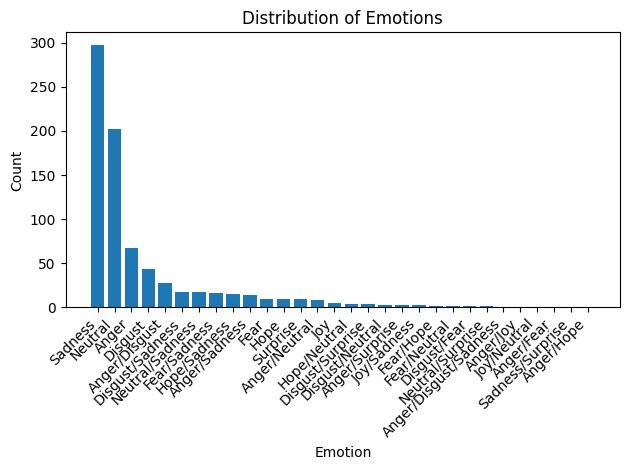

In [6]:
# Count the occurrences of each emotion
emotion_counts = ND1['emotion'].value_counts()

# Create a bar chart
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
le = LabelEncoder()
ND1['emotion'] = le.fit_transform(ND1['emotion'])


In [ ]:
# Convert personality columns to float
personality_column = [
    'personality_conscientiousness', 'personality_openess',
    'personality_extraversion', 'personality_agreeableness',
    'personality_stability'
]

for cols in personality_column:
    ND1[cols] = pd.to_numeric(ND1[cols], errors='coerce')

In [ ]:
 ND1['personality_conscientiousness']=ND1['personality_conscientiousness'].replace('-', '', regex=True)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ND1[personality_column + ['empathy', 'distress']].replace('unknown', np.nan).astype(float))


In [ ]:
# Adding scaled features to the DataFrame
for i, col in enumerate(personality_column + ['empathy', 'distress']):
    ND1[col] = scaled_features[:, i]

In [ ]:
# Prepare data for classification
# Assuming 'ND' is your DataFrame containing the necessary columns
X = ND1[['essay', 'empathy', 'distress'] + personality_column]
y = ND1['emotion']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert essays to feature vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_essay = vectorizer.fit_transform(X_train['essay']).toarray()
X_test_essay = vectorizer.transform(X_test['essay']).toarray()


In [ ]:
# Combine TF-IDF vectors with other features
X_train_combined = pd.DataFrame(X_train_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_train_combined = pd.concat([X_train_combined, X_train.drop(columns='essay').reset_index(drop=True)], axis=1)

X_test_combined = pd.DataFrame(X_test_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_test_combined = pd.concat([X_test_combined, X_test.drop(columns='essay').reset_index(drop=True)], axis=1)

In [ ]:
X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Columns: 4643 entries, 000 to personality_stability
dtypes: float64(4643)
memory usage: 22.4 MB


In [ ]:
# Combine TF-IDF vectors with other features, handling potential missing values
X_train_combined = pd.DataFrame(X_train_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_train_combined = pd.concat([X_train_combined, X_train.drop(columns='essay').reset_index(drop=True)], axis=1)
X_train_combined = X_train_combined.fillna(0) # Fill missing values with 0

X_test_combined = pd.DataFrame(X_test_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_test_combined = pd.concat([X_test_combined, X_test.drop(columns='essay').reset_index(drop=True)], axis=1)
X_test_combined = X_test_combined.fillna(0) # Fill missing values with 0

In [ ]:
!pip install torch torchtext scikit-learn pandas matplotlib torch-geometric transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many


Training CNN model:
Epoch 1/10
Train Loss: 2.3554, Val Loss: 2.2301
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 2/10
Train Loss: 1.9825, Val Loss: 2.0732
Val Accuracy: 0.4277, Val F1 Score: 0.2961

Epoch 3/10
Train Loss: 1.7392, Val Loss: 2.0616
Val Accuracy: 0.4214, Val F1 Score: 0.3153

Epoch 4/10
Train Loss: 1.4097, Val Loss: 2.1195
Val Accuracy: 0.4465, Val F1 Score: 0.3395

Epoch 5/10
Train Loss: 0.8966, Val Loss: 2.2386
Val Accuracy: 0.4403, Val F1 Score: 0.3230

Epoch 6/10
Train Loss: 0.3794, Val Loss: 2.5368
Val Accuracy: 0.4214, Val F1 Score: 0.3270

Epoch 7/10
Train Loss: 0.1518, Val Loss: 2.6616
Val Accuracy: 0.4465, Val F1 Score: 0.3566

Epoch 8/10
Train Loss: 0.0823, Val Loss: 3.0561
Val Accuracy: 0.4025, Val F1 Score: 0.3283

Epoch 9/10
Train Loss: 0.0482, Val Loss: 3.3182
Val Accuracy: 0.4151, Val F1 Score: 0.3155

Epoch 10/10
Train Loss: 0.0367, Val Loss: 3.1766
Val Accuracy: 0.4277, Val F1 Score: 0.3354



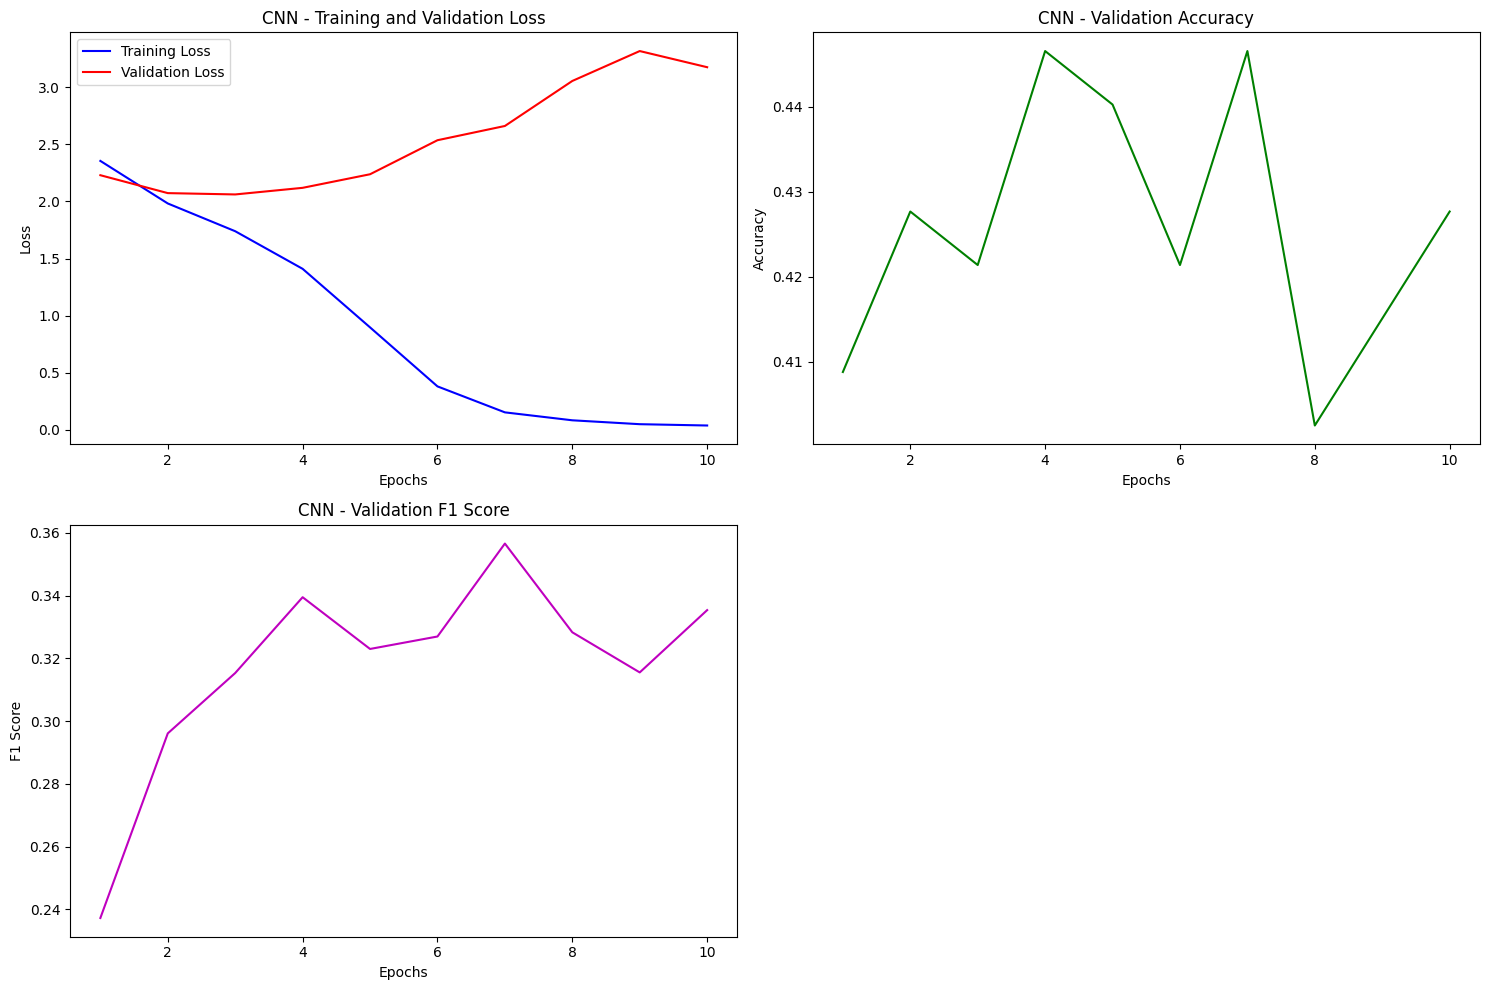


Training RNN model:
Epoch 1/10
Train Loss: 2.8285, Val Loss: 2.2489
Val Accuracy: 0.3711, Val F1 Score: 0.2537

Epoch 2/10
Train Loss: 2.2711, Val Loss: 2.0627
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 3/10
Train Loss: 2.1340, Val Loss: 2.0585
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 4/10
Train Loss: 2.1059, Val Loss: 2.0639
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 5/10
Train Loss: 2.0957, Val Loss: 2.0731
Val Accuracy: 0.4025, Val F1 Score: 0.2347

Epoch 6/10
Train Loss: 2.1013, Val Loss: 2.0710
Val Accuracy: 0.3899, Val F1 Score: 0.2294

Epoch 7/10
Train Loss: 2.0857, Val Loss: 2.0768
Val Accuracy: 0.3836, Val F1 Score: 0.2277

Epoch 8/10
Train Loss: 2.0390, Val Loss: 2.0670
Val Accuracy: 0.3962, Val F1 Score: 0.2516

Epoch 9/10
Train Loss: 2.0326, Val Loss: 2.0788
Val Accuracy: 0.3962, Val F1 Score: 0.2589

Epoch 10/10
Train Loss: 1.9892, Val Loss: 2.0740
Val Accuracy: 0.4025, Val F1 Score: 0.2694



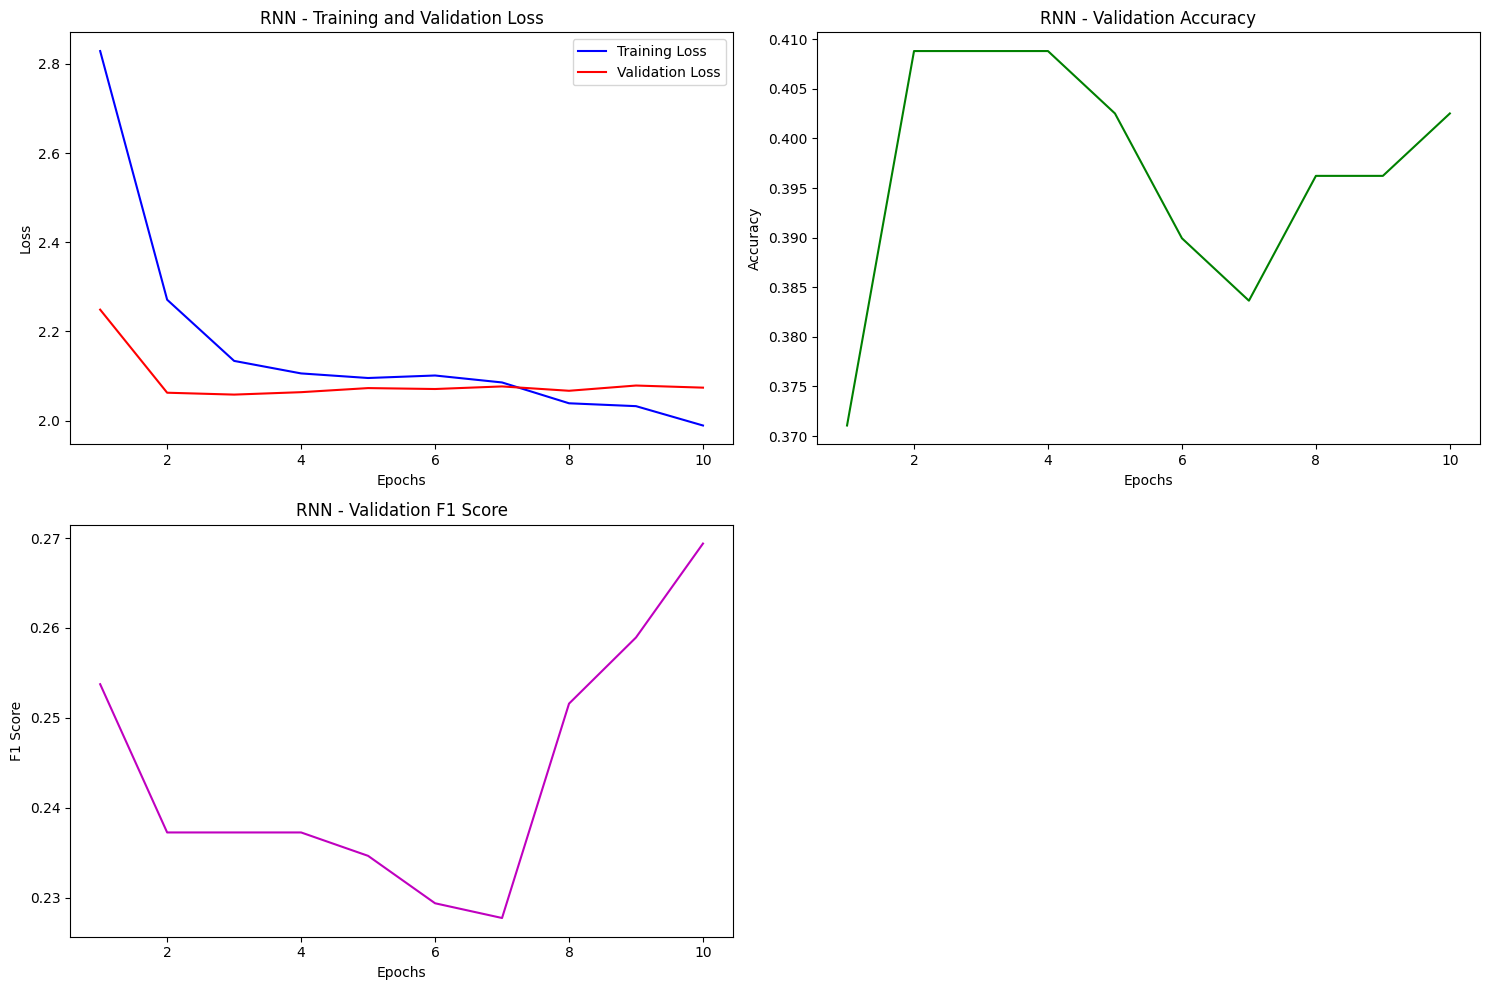


Training MLP model:
Epoch 1/10
Train Loss: 160.0205, Val Loss: 30.3692
Val Accuracy: 0.2956, Val F1 Score: 0.2543

Epoch 2/10
Train Loss: 63.5945, Val Loss: 15.1971
Val Accuracy: 0.3208, Val F1 Score: 0.2469

Epoch 3/10
Train Loss: 36.4666, Val Loss: 7.0465
Val Accuracy: 0.3836, Val F1 Score: 0.3206

Epoch 4/10
Train Loss: 21.1659, Val Loss: 4.2946
Val Accuracy: 0.2138, Val F1 Score: 0.2172

Epoch 5/10
Train Loss: 12.9849, Val Loss: 3.6880
Val Accuracy: 0.1321, Val F1 Score: 0.1539

Epoch 6/10
Train Loss: 8.4804, Val Loss: 3.4357
Val Accuracy: 0.0377, Val F1 Score: 0.0440

Epoch 7/10
Train Loss: 6.1781, Val Loss: 3.3546
Val Accuracy: 0.0189, Val F1 Score: 0.0124

Epoch 8/10
Train Loss: 5.4855, Val Loss: 3.3203
Val Accuracy: 0.4088, Val F1 Score: 0.2383

Epoch 9/10
Train Loss: 5.4348, Val Loss: 3.2940
Val Accuracy: 0.4088, Val F1 Score: 0.2383

Epoch 10/10
Train Loss: 4.6928, Val Loss: 3.2707
Val Accuracy: 0.4088, Val F1 Score: 0.2373



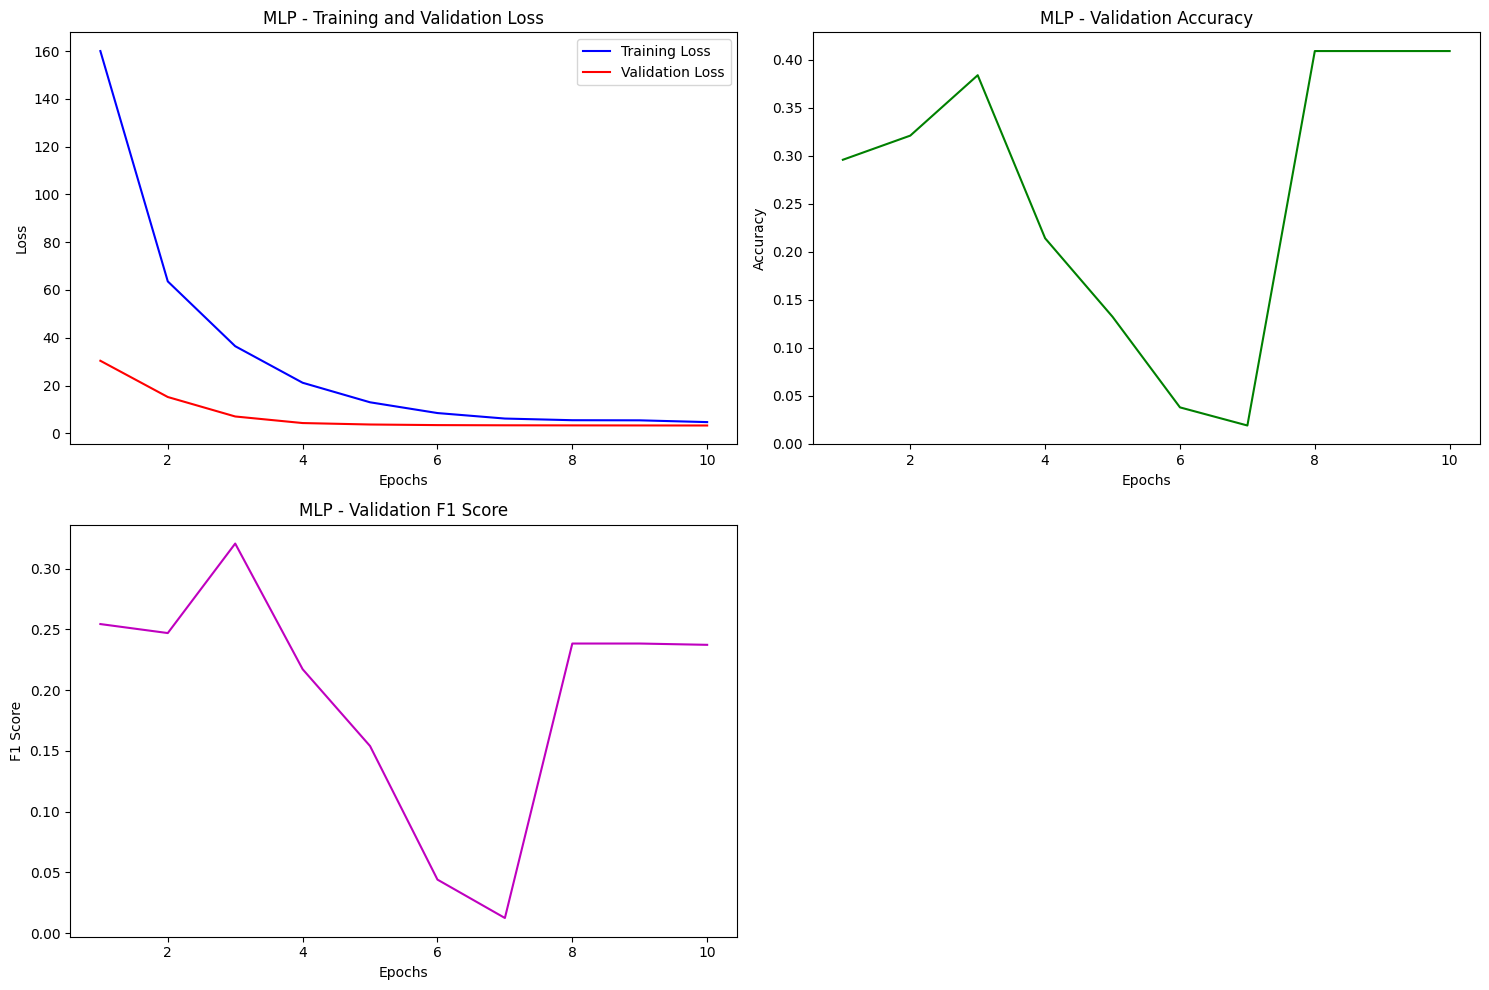


Training Transformer model:
Epoch 1/10
Train Loss: 2.3532, Val Loss: 2.0637
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 2/10
Train Loss: 2.1756, Val Loss: 2.0790
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 3/10
Train Loss: 2.1943, Val Loss: 2.0646
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 4/10
Train Loss: 2.1410, Val Loss: 2.0798
Val Accuracy: 0.4088, Val F1 Score: 0.2373

Epoch 5/10
Train Loss: 2.1702, Val Loss: 2.0704
Val Accuracy: 0.4591, Val F1 Score: 0.3523

Epoch 6/10
Train Loss: 2.1290, Val Loss: 2.0351
Val Accuracy: 0.4843, Val F1 Score: 0.3803

Epoch 7/10
Train Loss: 2.0568, Val Loss: 1.9791
Val Accuracy: 0.4528, Val F1 Score: 0.3414

Epoch 8/10
Train Loss: 1.9409, Val Loss: 1.9929
Val Accuracy: 0.4780, Val F1 Score: 0.3732

Epoch 9/10
Train Loss: 1.8541, Val Loss: 1.9519
Val Accuracy: 0.4843, Val F1 Score: 0.3728

Epoch 10/10
Train Loss: 1.8435, Val Loss: 1.9885
Val Accuracy: 0.4906, Val F1 Score: 0.3857



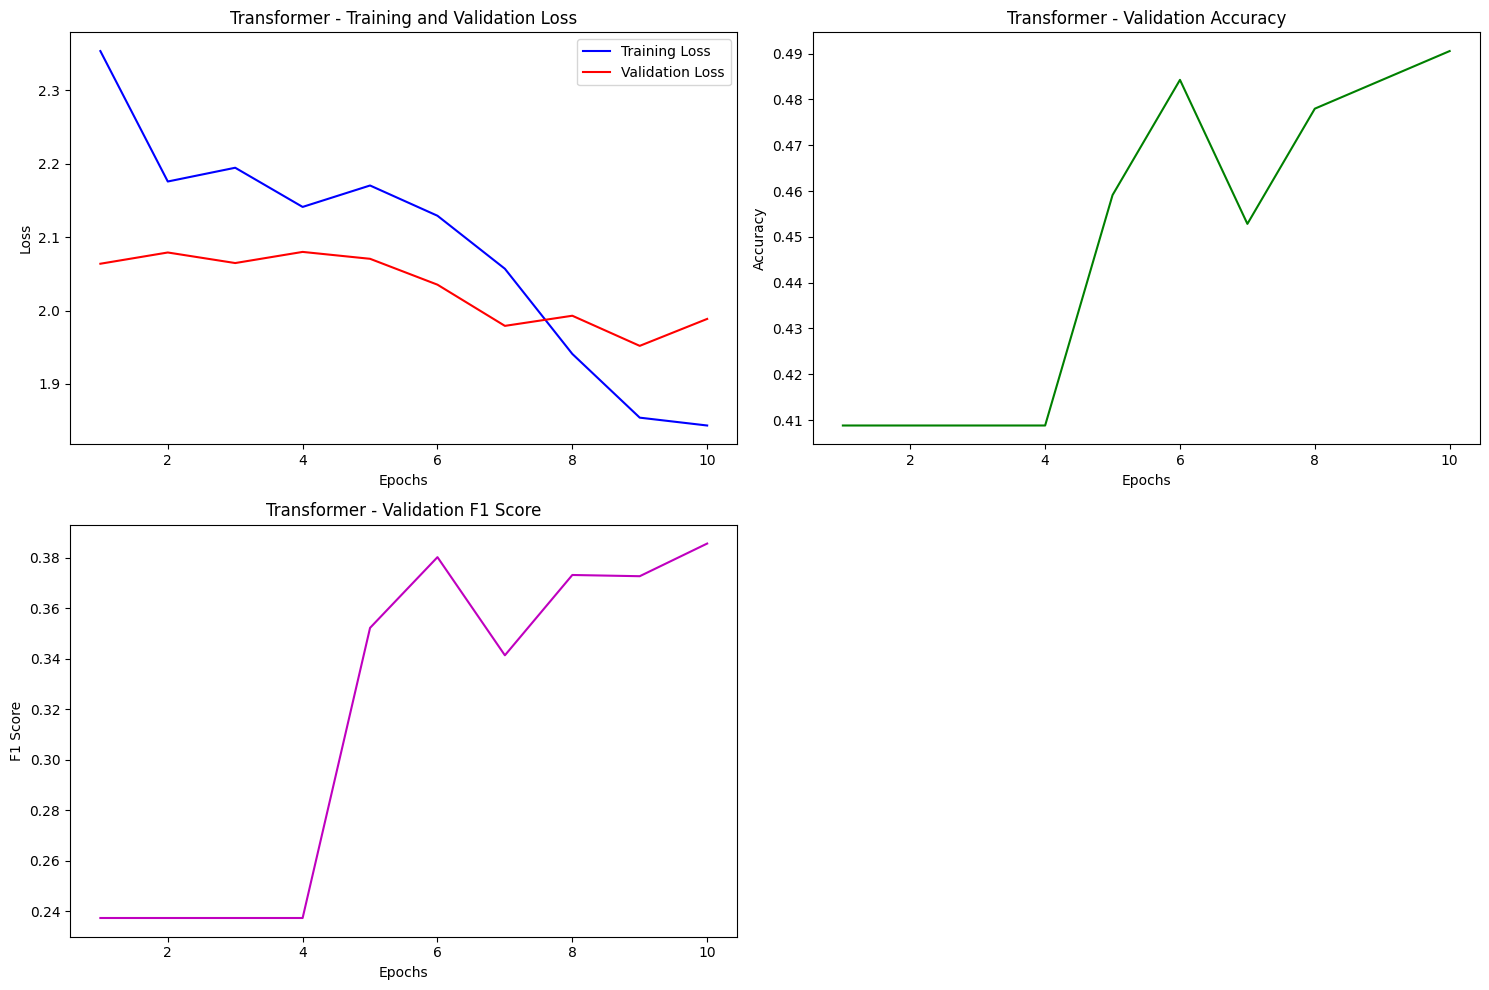

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel
# Add this line to disable the deprecation warning
import torchtext
torchtext.disable_torchtext_deprecation_warning()

# Step 1: Data Preparation
class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_length):
        self.texts = [str(text) for text in texts]
        self.labels = [int(label) for label in labels]
        self.vocab = vocab
        self.max_length = max_length
        self.tokenizer = get_tokenizer("basic_english")

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        tokens = self.tokenizer(text)
        encoded = [self.vocab[token] for token in tokens]
        padded = encoded[:self.max_length] + [0] * (self.max_length - len(encoded))
        return torch.tensor(padded), torch.tensor(label)

# Step 2: Model Definitions
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes, max_length):
        super(TextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv1 = nn.Conv1d(embed_dim, 128, kernel_size=3)
        self.conv2 = nn.Conv1d(128, 64, kernel_size=3)
        self.fc = nn.Linear(64 * (max_length - 4), num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.embedding(x).transpose(1, 2)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

class TextRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super(TextRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        x = self.dropout(hidden[-1])
        x = self.fc(x)
        return x

class TextMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(TextMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3 = nn.Linear(hidden_dim // 2, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.float()
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

class TextTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, num_layers, num_classes):
        super(TextTransformer, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Average pooling
        x = self.dropout(x)
        x = self.fc(x)
        return x

# Step 3: Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    model.to(device)
    train_losses, val_losses, val_accuracies, val_f1_scores = [], [], [], []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for texts, labels in train_loader:
            texts, labels = texts.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0.0
        val_preds, val_true = [], []
        with torch.no_grad():
            for texts, labels in val_loader:
                texts, labels = texts.to(device), labels.to(device)
                outputs = model(texts)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                val_preds.extend(outputs.argmax(dim=1).cpu().numpy())
                val_true.extend(labels.cpu().numpy())

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        val_accuracy = accuracy_score(val_true, val_preds)
        val_f1 = f1_score(val_true, val_preds, average='weighted')

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_f1_scores.append(val_f1)

        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        print(f"Val Accuracy: {val_accuracy:.4f}, Val F1 Score: {val_f1:.4f}\n")

    return train_losses, val_losses, val_accuracies, val_f1_scores

# Step 4: Main Execution
def main():
    # Load and preprocess data
    df = pd.read_csv("/content/drive/MyDrive/WASSA23_essay_level_with_labels_train (3).tsv", sep='\t')
    df = df.dropna(subset=['essay', 'emotion'])
    le = LabelEncoder()
    df['emotion'] = le.fit_transform(df['emotion'])

    X = df['essay']
    y = df['emotion']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build vocabulary
    tokenizer = get_tokenizer("basic_english")
    vocab = build_vocab_from_iterator(map(tokenizer, X_train), specials=[""])
    vocab.set_default_index(vocab[""])

    # Create datasets and dataloaders
    max_length = 100
    train_dataset = TextDataset(X_train, y_train, vocab, max_length)
    test_dataset = TextDataset(X_test, y_test, vocab, max_length)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Model parameters
    vocab_size = len(vocab)
    embed_dim = 100
    num_classes = len(set(y))
    hidden_dim = 128
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize models
    cnn_model = TextCNN(vocab_size, embed_dim, num_classes, max_length)
    rnn_model = TextRNN(vocab_size, embed_dim, hidden_dim, num_classes)
    mlp_model = TextMLP(max_length, hidden_dim, num_classes)
    transformer_model = TextTransformer(vocab_size, embed_dim, num_heads=4, num_layers=2, num_classes=num_classes)

    # Training parameters
    criterion = nn.CrossEntropyLoss()
    num_epochs = 10

    # Train models
    models = [
        ("CNN", cnn_model, optim.Adam(cnn_model.parameters())),
        ("RNN", rnn_model, optim.Adam(rnn_model.parameters())),
        ("MLP", mlp_model, optim.Adam(mlp_model.parameters())),
        ("Transformer", transformer_model, optim.Adam(transformer_model.parameters()))
    ]

    for model_name, model, optimizer in models:
        print(f"\nTraining {model_name} model:")
        results = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs, device)
        plot_results(model_name, *results)

def plot_results(model_name, train_losses, val_losses, val_accuracies, val_f1_scores):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, val_accuracies, 'g-')
    plt.title(f'{model_name} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_f1_scores, 'm-')
    plt.title(f'{model_name} - Validation F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')

    plt.tight_layout()
    plt.savefig(f'{model_name}_results.png')
    plt.show()
    plt.close()

if __name__ == "__main__":
    main()